In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas_datareader as pdr
df = pdr.get_data_tiingo('AAPL', api_key = 'your_tiinger_api_key')

<ipython-input-54-c593d4b8cbbd>:2: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-08-28 00:00:00+00:00,219.70,220.54,218.92,219.01,22776766,52.599661,52.800770,52.412917,52.434464,91107064,0.0,1.0
1,AAPL,2018-08-29 00:00:00+00:00,222.98,223.49,219.41,220.15,27254804,53.384945,53.507047,52.530230,52.707398,109019216,0.0,1.0
2,AAPL,2018-08-30 00:00:00+00:00,225.03,228.26,222.40,223.25,48793824,53.875748,54.649061,53.246084,53.449587,195175296,0.0,1.0
3,AAPL,2018-08-31 00:00:00+00:00,227.63,228.87,226.00,226.51,43340134,54.498229,54.795104,54.107981,54.230083,173360536,0.0,1.0
4,AAPL,2018-09-04 00:00:00+00:00,228.36,229.18,226.63,228.41,27390132,54.673002,54.869323,54.258813,54.684973,109560528,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-08-21 00:00:00+00:00,175.84,176.130,173.735,175.070,46311879,175.84,176.130,173.735,175.070,46311879,0.0,1.0
1253,AAPL,2023-08-22 00:00:00+00:00,177.23,177.680,176.250,177.060,42084245,177.23,177.680,176.250,177.060,42084245,0.0,1.0
1254,AAPL,2023-08-23 00:00:00+00:00,181.12,181.550,178.325,178.520,52722752,181.12,181.550,178.325,178.520,52722752,0.0,1.0
1255,AAPL,2023-08-24 00:00:00+00:00,176.38,181.104,176.010,180.674,54945798,176.38,181.104,176.010,180.674,54945798,0.0,1.0
1256,AAPL,2023-08-25 00:00:00+00:00,178.61,179.150,175.820,177.380,51449594,178.61,179.150,175.820,177.380,51449594,0.0,1.0


In [ ]:
df['date'].tail()

1252    2023-08-21 00:00:00+00:00
1253    2023-08-22 00:00:00+00:00
1254    2023-08-23 00:00:00+00:00
1255    2023-08-24 00:00:00+00:00
1256    2023-08-25 00:00:00+00:00
Name: date, dtype: object

In [ ]:
prices = df['close']
prices.shape

(1257,)

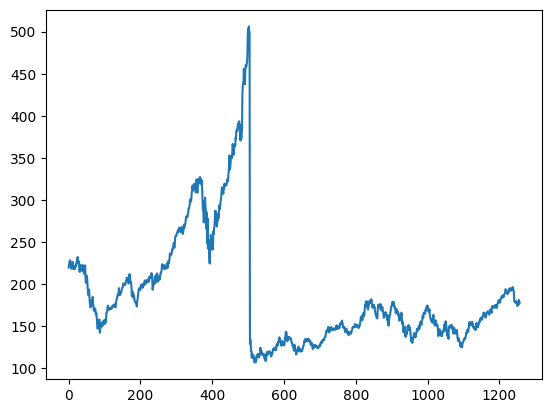

In [ ]:
import matplotlib.pyplot as plt
plt.plot(prices)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# scaling price for lstm

scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(np.array(prices).reshape(-1, 1))


In [ ]:
# Choose an appropriate sequence length(output will depend on seq prev to it we can also say seq as # of features)
sequence_length = 100
def create_dataset(time_step=1,data = prices_scaled):
  sequences = []
  next_prices = []
  for i in range(len(data) - sequence_length):
      sequences.append(data[i:i+sequence_length])
      next_prices.append(data[i+sequence_length])
  X = np.array(sequences)
  y = np.array(next_prices)

  return X, y



In [ ]:
X,y = create_dataset(3, prices_scaled)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(925, 100, 1)

In [ ]:
print(X_train)

[[[0.1979211 ]
  [0.1756794 ]
  [0.17517846]
  ...
  [0.23070758]
  [0.2305072 ]
  [0.23140889]]

 [[0.44440827]
  [0.45853475]
  [0.45825924]
  ...
  [0.50770194]
  [0.50311835]
  [0.5212774 ]]

 [[0.443732  ]
  [0.44440827]
  [0.45853475]
  ...
  [0.50296807]
  [0.50770194]
  [0.50311835]]

 ...

 [[0.09986224]
  [0.10289292]
  [0.10161553]
  ...
  [0.21828428]
  [0.21763306]
  [0.2210645 ]]

 [[0.13119599]
  [0.15902317]
  [0.17016907]
  ...
  [0.05815905]
  [0.06191609]
  [0.07271133]]

 [[0.11448967]
  [0.10429555]
  [0.10537257]
  ...
  [0.20348153]
  [0.20771446]
  [0.20964308]]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
29/29 [==============================] - 7s 98ms/step - loss: 0.0133
Epoch 2/50
29/29 [==============================] - 3s 118ms/step - loss: 0.0044
Epoch 3/50
29/29 [==============================] - 4s 148ms/step - loss: 0.0032
Epoch 4/50
29/29 [==============================] - 3s 97ms/step - loss: 0.0027
Epoch 5/50
29/29 [==============================] - 3s 98ms/step - loss: 0.0027
Epoch 6/50
29/29 [==============================] - 3s 97ms/step - loss: 0.0019
Epoch 7/50
29/29 [==============================] - 4s 154ms/step - loss: 0.0020
Epoch 8/50
29/29 [==============================] - 3s 109ms/step - loss: 0.0015
Epoch 9/50
29/29 [==============================] - 3s 99ms/step - loss: 0.0020
Epoch 10/50
29/29 [==============================] - 3s 97ms/step - loss: 0.0013
Epoch 11/50
29/29 [==============================] - 4s 147ms/step - loss: 0.0011
Epoch 12/50
29/29 [==============================] - 4s 136ms/step - loss: 0.0011
Epoch 13/50
29/29 [============

In [ ]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


8/8 [==============================] - 1s 27ms/step


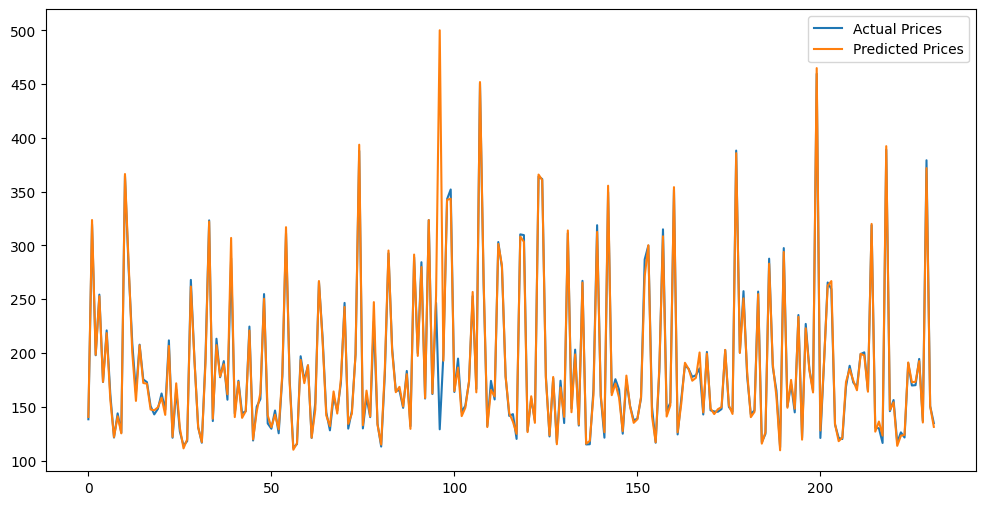

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test), label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend()
plt.show()


1/1 [==============================] - 0s 47ms/step


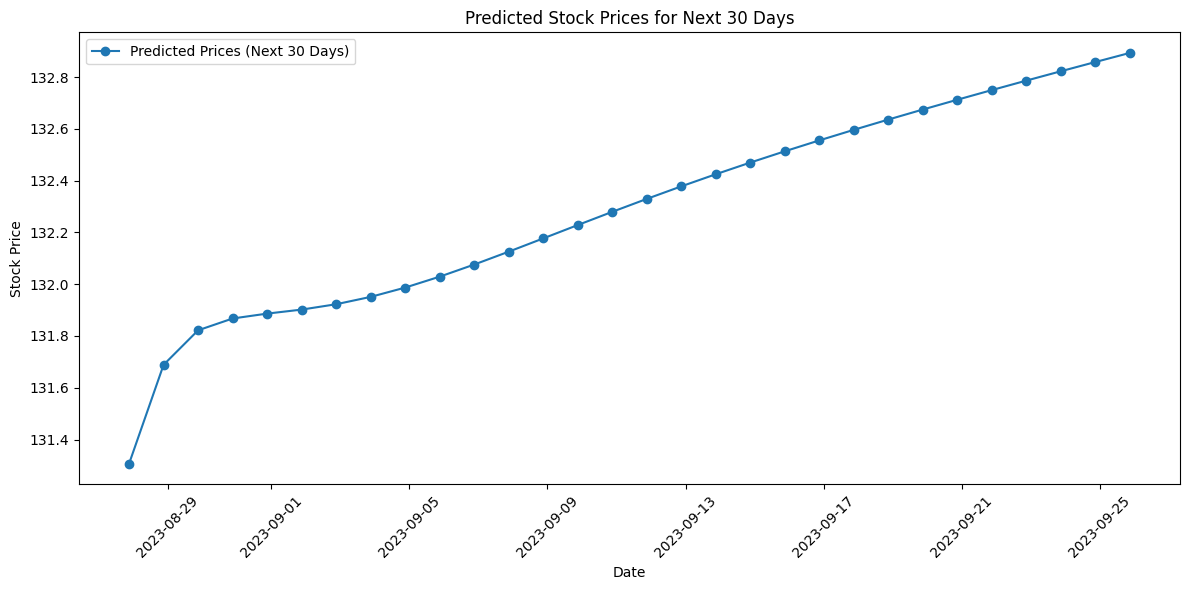

In [ ]:
from datetime import datetime, timedelta

# Generate timestamps for the next 30 days
current_date = datetime.now()
next_30_days = [current_date + timedelta(days=i) for i in range(30)]

# Generate predictions for the next 30 days
future_predictions = []
last_sequence = X_test[-1]  # Last sequence from the test set

for _ in range(30):  # Predict for the next 30 days
    prediction = model.predict(last_sequence.reshape(1, sequence_length, 1))
    future_predictions.append(prediction)

    # Update the last_sequence with the new prediction and remove the first value
    last_sequence = np.append(last_sequence[1:], prediction)

# Convert the list of future predictions to a numpy array
future_predictions = np.array(future_predictions).reshape(-1, 1)

# Inverse transform the scaled predictions to get actual stock prices
future_predictions = scaler.inverse_transform(future_predictions)

# Plot the future predictions with timestamps
plt.figure(figsize=(12, 6))
plt.plot(next_30_days, future_predictions, marker='o', label='Predicted Prices (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Predicted Stock Prices for Next 30 Days')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
!pip install plotly
import plotly.express as px

# Create a DataFrame for the predicted prices and timestamps
future_df = pd.DataFrame({'Date': next_30_days, 'Predicted Price': future_predictions.flatten()})

# Create an interactive line chart using Plotly Express
fig = px.line(future_df, x='Date', y='Predicted Price', title='Predicted Stock Prices for Next 30 Days')
fig.update_xaxes(tickangle=45)  # Rotate x-axis labels for better readability
fig.update_layout(showlegend=True)
fig.show()
